<a href="https://colab.research.google.com/github/pabair/rl-course-ws2020/blob/main/4_PyTorch_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimal PyTorch Example



This notebook is inspired by https://jamesmccaffrey.wordpress.com/2020/05/22/a-minimal-pytorch-complete-example/

In [19]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
np.random.seed(1)

The following lines check for a GPU and decides if we want to train on the CPU or the GPU (if available).

In [18]:
if(torch.cuda.is_available()):
  print(f"{torch.cuda.get_device_name(0)} available")
else:
  print("No GPU available")

compute_chip = "cpu"
#compute_chip = "cuda:0"
device = torch.device(compute_chip)
device

No GPU available


device(type='cpu')

We start by generating our data set as numpy arrays.

In [22]:
train_x = np.array([
  [5.0, 3.5, 1.3, 0.3],
  [4.5, 2.3, 1.3, 0.3],
  [5.5, 2.6, 4.4, 1.2],
  [6.1, 3.0, 4.6, 1.4],
  [6.7, 3.1, 5.6, 2.4],
  [6.9, 3.1, 5.1, 2.3]], dtype=np.float32) 

train_y = np.array([0, 0, 1, 1, 2, 2], dtype=np.long)

print("\nTraining predictors:")
print(train_x)
print("\nTraining class labels: ")
print(train_y)



Training predictors:
[[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]]

Training class labels: 
[0 0 1 1 2 2]


To be able to work with them in PyTorch the data is converted to PyTorch tensors

In [23]:
train_x = T.tensor(train_x, dtype=torch.float32).to(device)
train_y = T.tensor(train_y, dtype=torch.long).to(device)

We now define our neural network that has 4 input features, 7 hidden layer nodes and 3 output neurons. The hidden layer uses a Relu activation function.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden = T.nn.Linear(4, 7)  
    self.output = T.nn.Linear(7, 3)

  def forward(self, x):
    z = F.relu(self.hidden(x))
    z = self.output(z)  # no softmax. see CrossEntropyLoss() 
    return z

We can now start training. several epochs, gradient descent, bla

In [29]:
# create network and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
max_epochs = 50
lrn_rate = 0.04
loss_func = T.nn.CrossEntropyLoss()  # applies softmax()
optimizer = T.optim.SGD(net.parameters(), lr=lrn_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, max_epochs):

  epoch_loss = 0

  optimizer.zero_grad()
  oupt = net(train_x)

  loss = loss_func(oupt, train_y)
  loss.backward()
  optimizer.step()

  epoch_loss += loss.item()

  train_losses.append(epoch_loss)
  
  print(f"Loss in epoch {epoch+1} is {epoch_loss}")

print("Done training ")


Starting training 
Loss in epoch 1 is 1.261938214302063
Loss in epoch 2 is 1.088046669960022
Loss in epoch 3 is 1.037471890449524
Loss in epoch 4 is 1.0145313739776611
Loss in epoch 5 is 0.9954627156257629
Loss in epoch 6 is 0.9801054000854492
Loss in epoch 7 is 0.9632339477539062
Loss in epoch 8 is 0.928635835647583
Loss in epoch 9 is 0.9065180420875549
Loss in epoch 10 is 0.8926162123680115
Loss in epoch 11 is 0.8787279725074768
Loss in epoch 12 is 0.8641820549964905
Loss in epoch 13 is 0.8498549461364746
Loss in epoch 14 is 0.8389857411384583
Loss in epoch 15 is 0.828940212726593
Loss in epoch 16 is 0.81988924741745
Loss in epoch 17 is 0.8101615309715271
Loss in epoch 18 is 0.8001749515533447
Loss in epoch 19 is 0.7911115288734436
Loss in epoch 20 is 0.7819629311561584
Loss in epoch 21 is 0.7736766934394836
Loss in epoch 22 is 0.7645843625068665
Loss in epoch 23 is 0.7557646632194519
Loss in epoch 24 is 0.7468578219413757
Loss in epoch 25 is 0.7397375702857971
Loss in epoch 26 is 0

Text(0, 0.5, 'loss')

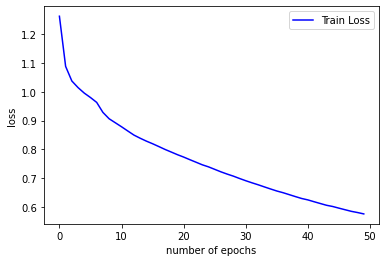

In [30]:
  fig = plt.figure()
  plt.plot(range(0, max_epochs), train_losses, color='blue')
  plt.legend(['Train Loss'], loc='upper right')
  plt.xlabel('number of epochs')
  plt.ylabel('loss')

Next, we check the model accuracy on the test data.

In [ ]:
# 4. (evaluate model accuracy)

Predict on a single data point

In [31]:
net.eval()
print("\nPredicting species for [5.8, 2.8, 4.5, 1.3]: ")
unk = np.array([[5.8, 2.8, 4.5, 1.3]], dtype=np.float32)
unk = T.tensor(unk, dtype=T.float32).to(device) 
logits = net(unk).to(device)
probs = T.softmax(logits, dim=1)
probs = probs.detach().numpy()  # allows printoptions

np.set_printoptions(precision=4)
print(probs)


Predicting species for [5.8, 2.8, 4.5, 1.3]: 
[[0.1155 0.4129 0.4716]]
